In [1]:
import numpy as np
import math
import random
from scipy.optimize import least_squares
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
# Apply the default theme
plt.style.use('seaborn-white')
from sklearn.model_selection import train_test_split
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

In [2]:
r1data = pd.read_csv('R1blood_data_table.csv')
r1data

,Ref,B0,R1,blood source or tissue,Hct,fwatere,so2,po2
0,stefanovic and pike,1.5,0.873,Human blood,0.512,0.450025,0.42,32.830968
1,stefanovic and pike,1.5,0.848,Human blood,0.512,0.450025,0.43,33.332357
2,stefanovic and pike,1.5,0.839,Human blood,0.512,0.450025,0.48,35.919218
3,stefanovic and pike,1.5,0.836,Human blood,0.512,0.450025,0.62,44.355294
4,stefanovic and pike,1.5,0.832,Human blood,0.512,0.450025,0.66,47.303412
...,...,...,...,...,...,...,...,...
161,Blockley,7.0,0.520,Human blood ex vivo,0.435,0.371568,0.64,45.787711
162,Blockley,7.0,0.520,Human blood ex vivo,0.435,0.371568,0.56,40.456899
163,Blockley,7.0,0.530,Human blood ex vivo,0.435,0.371568,0.56,40.456899
164,Blockley,7.0,0.530,Human blood ex vivo,0.435,0.371568,0.53,38.683603


In [3]:
B0=r1data.B0
np.shape(B0)

(166,)

In [4]:
y=r1data.R1
np.shape(y)

(166,)

In [5]:
fw=r1data.fwatere
np.shape(fw)

(166,)

In [6]:
po2=r1data.po2
np.shape(po2)

(166,)

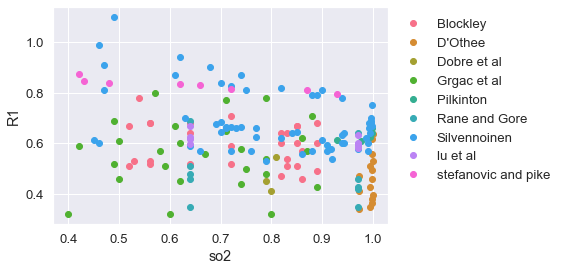

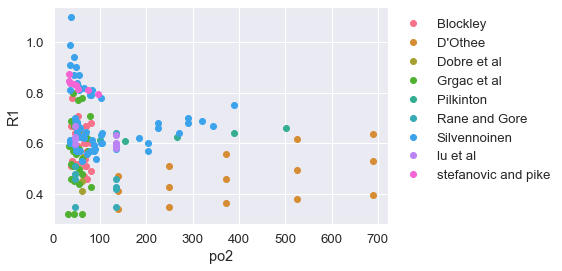

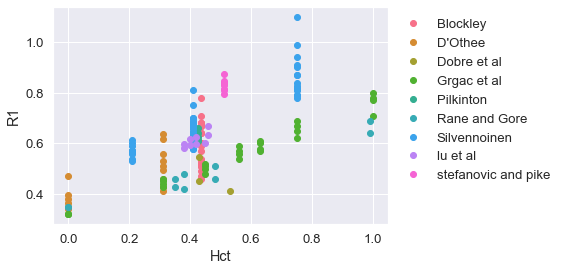

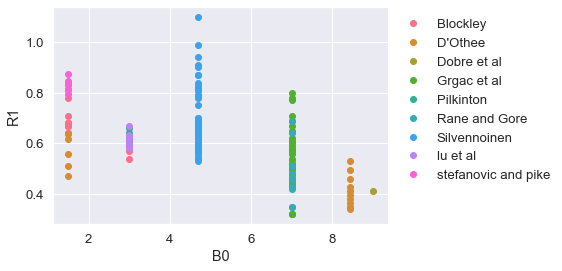

In [7]:
sns.set(font_scale=1.2)
sns.set_palette("husl", 9)
groups = r1data.groupby('Ref')
# Plot

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.so2, group.R1, marker='o', linestyle='', label=name)
ax.legend(bbox_to_anchor=(1, 1))
plt.xlabel('so2')
plt.ylabel('R1')
plt.show()

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.po2, group.R1, marker='o', linestyle='', label=name)
ax.legend(bbox_to_anchor=(1, 1))
plt.xlabel('po2')
plt.ylabel('R1')
plt.show()

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.Hct, group.R1, marker='o', linestyle='', label=name)
ax.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Hct')
plt.ylabel('R1')
plt.show()

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.B0, group.R1, marker='o', linestyle='', label=name)
ax.legend(bbox_to_anchor=(1, 1))
plt.xlabel('B0')
plt.ylabel('R1')
plt.show()

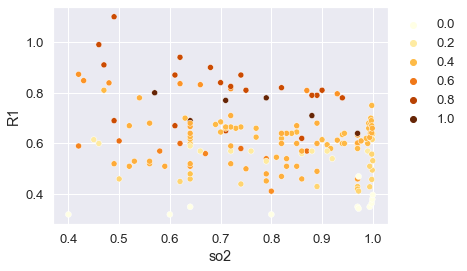

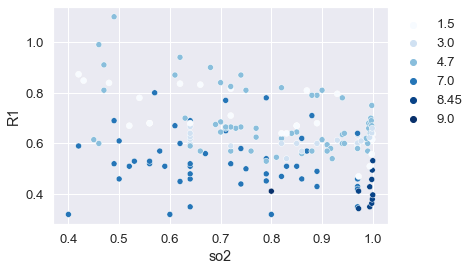

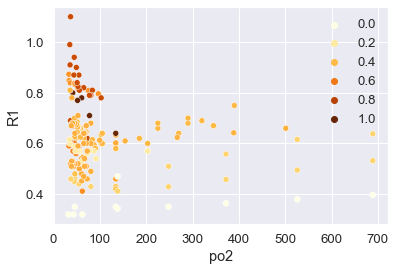

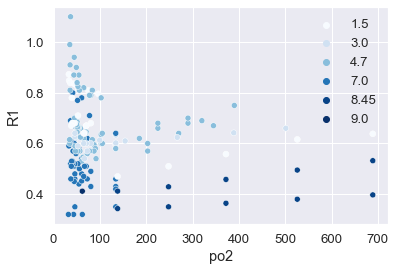

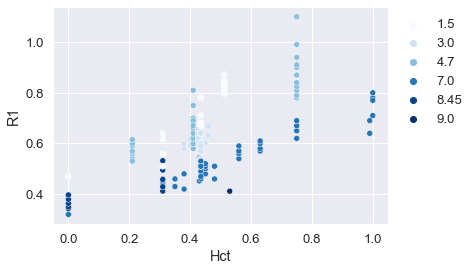

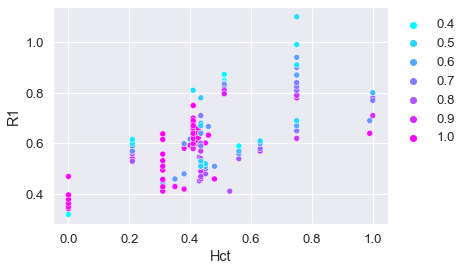

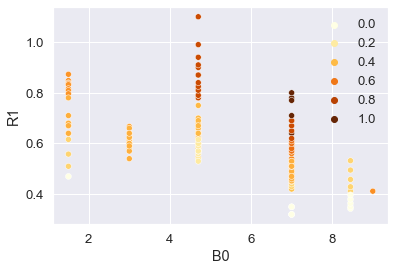

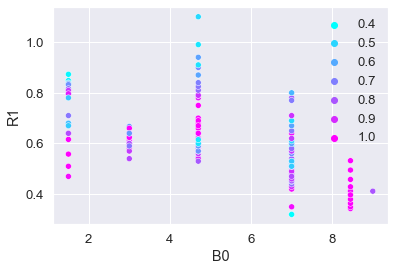

In [8]:
sns.set(font_scale=1.2)
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
sns.scatterplot(x="so2", y="R1", data=r1data, hue="Hct",palette="YlOrBr")
ax.legend(bbox_to_anchor=(1, 1))

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
sns.scatterplot(x="so2", y="R1", data=r1data, hue="B0",palette="Blues")
ax.legend(bbox_to_anchor=(1, 1))


fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
sns.scatterplot(x="po2", y="R1", data=r1data, hue="Hct",palette="YlOrBr")
ax.legend(bbox_to_anchor=(1, 1))


fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
sns.scatterplot(x="po2", y="R1", data=r1data, hue="B0",palette="Blues")
ax.legend(bbox_to_anchor=(1, 1))


fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

sns.scatterplot(x="Hct", y="R1", data=r1data, hue="B0",palette="Blues")
ax.legend(bbox_to_anchor=(1, 1))

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
sns.scatterplot(x="Hct", y="R1", data=r1data, hue="so2",palette="cool")
ax.legend(bbox_to_anchor=(1, 1))


fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
sns.scatterplot(x="B0", y="R1", data=r1data, hue="Hct",palette="YlOrBr")
ax.legend(bbox_to_anchor=(1, 1))


fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
sns.scatterplot(x="B0", y="R1", data=r1data, hue="so2",palette="cool")
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

In [9]:
r1data = pd.read_csv('R1blood_data_table.csv')
r1data

nrepetitions=10000
nsamples=math.floor(len(r1data)*0.9)
ntest=len(r1data)-nsamples

list_of_bR1eox=np.zeros(nrepetitions)
list_of_mR1eox=np.zeros(nrepetitions)
list_of_mr1deoxyHb=np.zeros(nrepetitions)
list_of_br1deoxyHb=np.zeros(nrepetitions)
list_of_bR1p=np.zeros(nrepetitions)
list_of_mR1p=np.zeros(nrepetitions)
list_of_mr1poxHct=np.zeros(nrepetitions)
list_of_br1pox_r1=np.zeros(nrepetitions)
list_of_mr1pox_r1=np.zeros(nrepetitions)

list_of_y_guess=np.zeros((nrepetitions,ntest))
list_of_y_test=np.zeros((nrepetitions,ntest))
list_of_B0_test=np.zeros((nrepetitions,ntest))
list_of_po2_test=np.zeros((nrepetitions,ntest))
list_of_fw_test=np.zeros((nrepetitions,ntest))
list_of_Hct_test=np.zeros((nrepetitions,ntest))


B0_alldata=r1data.B0
y_alldata=r1data.R1
fw_alldata=r1data.fwatere
po2_alldata=r1data.po2
Hct_alldata=r1data.Hct




n=2.7
P50=37
Hb=5.15


for i in range(0,nrepetitions):
    
    B0,B0_test,y,y_test,fw,fw_test,po2,po2_test,Hct,Hct_test = train_test_split(B0_alldata,y_alldata,fw_alldata,po2_alldata,Hct_alldata, test_size=0.10)


    def R1funB0_5(x, fw, y, po2,B0):

        return fw*((x[0]+(x[1]*B0))+((x[2]+(x[3]*B0))*Hb*(1-((po2**n)/((po2**n)+(P50**n))))))+(1-fw)*((x[4]+(x[5]*B0))+((x[6]+(x[7]*B0)+(x[8]*Hct))*po2))-y

    x0_5 = np.array([1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])
    res_lsq_5 = least_squares(R1funB0_5, x0_5, args=(fw,y,po2,B0))

    y_guess=fw_test*((res_lsq_5.x[0]+(res_lsq_5.x[1]*B0_test)) + ((res_lsq_5.x[2]+(res_lsq_5.x[3]*B0_test))*Hb*(1-((po2_test**n)/((po2_test**n)+(P50**n)))))) + (1-fw_test)*((res_lsq_5.x[4]+(res_lsq_5.x[5]*B0_test))+((res_lsq_5.x[6]+(res_lsq_5.x[7]*B0_test)+(res_lsq_5.x[8]*Hct_test))*po2_test))


    
    list_of_y_test[i]=y_test
    list_of_y_guess[i]=y_guess
    list_of_B0_test[i]=B0_test
    list_of_fw_test[i]=fw_test
    list_of_po2_test[i]=po2_test
    list_of_Hct_test[i]=Hct_test

    
    list_of_bR1eox[i] =res_lsq_5.x[0]
    list_of_mR1eox[i] =res_lsq_5.x[1]
    list_of_br1deoxyHb[i] =res_lsq_5.x[2]
    list_of_mr1deoxyHb[i] =res_lsq_5.x[3]
    list_of_bR1p[i] =res_lsq_5.x[4]
    list_of_mR1p[i] =res_lsq_5.x[5]
    list_of_br1pox_r1[i] =res_lsq_5.x[6]
    list_of_mr1pox_r1[i] =res_lsq_5.x[7]
    list_of_mr1poxHct[i]=res_lsq_5.x[8]
    

In [10]:


def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    
    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    ax.scatter( x, y, c=z, **kwargs )

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    return ax


flat_list_of_y_test=list_of_y_test.flatten()
flat_list_of_y_guess=list_of_y_guess.flatten()
flat_list_of_B0_test=list_of_B0_test.flatten()
flat_list_of_po2_test=list_of_po2_test.flatten()
flat_list_of_fw_test=list_of_fw_test.flatten()
flat_list_of_Hct_test=list_of_Hct_test.flatten()

y_error=flat_list_of_y_test-flat_list_of_y_guess
mean_R1error=np.mean(y_error)
std_R1error=np.std(y_error)

y_guess_reshape=np.reshape(flat_list_of_y_guess,(-1, 1))
y_test_reshape=np.reshape(flat_list_of_y_test,(-1, 1))

reg_v_true = LinearRegression().fit(y_test_reshape, y_guess_reshape)

print('Estimate vs True R2=',reg_v_true.score(y_test_reshape, y_guess_reshape))


Estimate vs True R2= 0.813154488384017


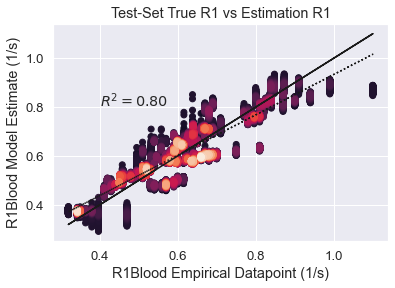

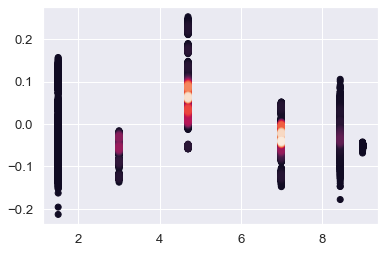

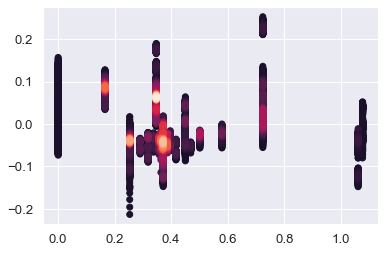

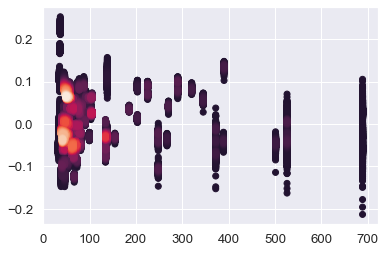

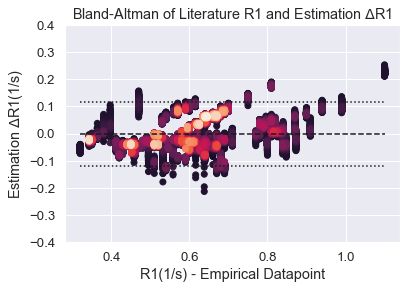

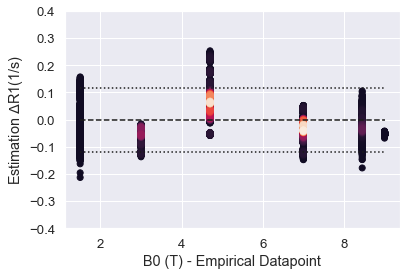

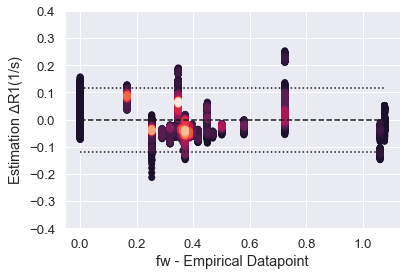

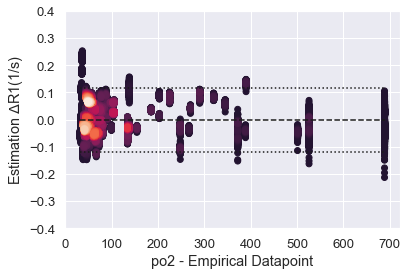

In [11]:
sns.set(font_scale=1.2)
density_scatter(flat_list_of_y_test, flat_list_of_y_guess, bins = [50,50] )
plt.plot(flat_list_of_y_test,flat_list_of_y_test,'k')
plt.plot(y_test_reshape,np.squeeze(reg_v_true.predict(y_test_reshape)),'k',linestyle='dotted')
plt.text(0.4,0.8, '$R^2=0.80$')
plt.xlabel('R1Blood Empirical Datapoint (1/s)')
plt.ylabel('R1Blood Model Estimate (1/s)')
plt.title('Test-Set True R1 vs Estimation R1')


density_scatter(flat_list_of_B0_test,y_error,bins = [50,50] )
plt.show()
density_scatter(flat_list_of_fw_test,y_error,bins = [50,50])
plt.show()
density_scatter(flat_list_of_po2_test,y_error,bins = [50,50])
plt.show()


crude_lower_limit = mean_R1error-1.96*std_R1error
crude_upper_limit = mean_R1error+ 1.96*std_R1error

density_scatter(flat_list_of_y_test,y_error,bins = [50,50])
plt.hlines(mean_R1error,np.min(list_of_y_test),np.max(list_of_y_test),linestyle='dashed')
plt.hlines(crude_lower_limit,np.min(list_of_y_test),np.max(list_of_y_test),linestyle='dotted')
plt.hlines(crude_upper_limit,np.min(list_of_y_test),np.max(list_of_y_test),linestyle='dotted')
plt.ylim(-0.4,0.4)
plt.xlabel('R1(1/s) - Empirical Datapoint')
plt.ylabel('Estimation $\Delta$R1(1/s)')
plt.title('Bland-Altman of Literature R1 and Estimation $\Delta$R1')

plt.show()


density_scatter(flat_list_of_B0_test,y_error,bins = [50,50])
plt.hlines(mean_R1error,np.min(flat_list_of_B0_test),np.max(flat_list_of_B0_test),linestyle='dashed')
plt.hlines(crude_lower_limit,np.min(flat_list_of_B0_test),np.max(flat_list_of_B0_test),linestyle='dotted')
plt.hlines(crude_upper_limit,np.min(flat_list_of_B0_test),np.max(flat_list_of_B0_test),linestyle='dotted')
plt.ylim(-0.4,0.4)
plt.xlabel('B0 (T) - Empirical Datapoint')
plt.ylabel('Estimation $\Delta$R1(1/s)')
plt.show()


density_scatter(flat_list_of_fw_test,y_error,bins = [50,50])
plt.hlines(mean_R1error,np.min(flat_list_of_fw_test),np.max(flat_list_of_fw_test),linestyle='dashed')
plt.hlines(crude_lower_limit,np.min(flat_list_of_fw_test),np.max(flat_list_of_fw_test),linestyle='dotted')
plt.hlines(crude_upper_limit,np.min(flat_list_of_fw_test),np.max(flat_list_of_fw_test),linestyle='dotted')
plt.ylim(-0.4,0.4)
plt.xlabel('fw - Empirical Datapoint')
plt.ylabel('Estimation $\Delta$R1(1/s)')
plt.show()

density_scatter(flat_list_of_po2_test,y_error,bins = [50,50])
plt.hlines(mean_R1error,np.min(flat_list_of_po2_test),np.max(flat_list_of_po2_test),linestyle='dashed')
plt.hlines(crude_lower_limit,np.min(flat_list_of_po2_test),np.max(flat_list_of_po2_test),linestyle='dotted')
plt.hlines(crude_upper_limit,np.min(flat_list_of_po2_test),np.max(flat_list_of_po2_test),linestyle='dotted')
plt.ylim(-0.4,0.4)
plt.xlabel('po2 - Empirical Datapoint')
plt.ylabel('Estimation $\Delta$R1(1/s)')
plt.show()



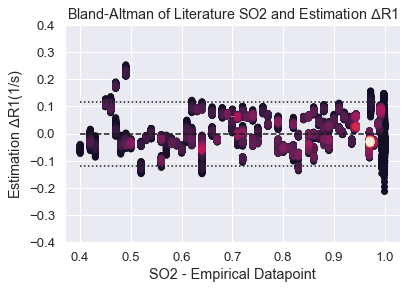

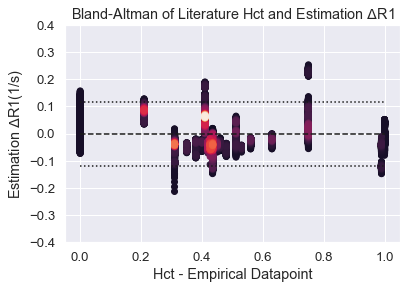

In [12]:
so2_test=(flat_list_of_po2_test**n)/((flat_list_of_po2_test**n)+(P50**n))

density_scatter(so2_test,y_error,bins = [50,50])
plt.hlines(mean_R1error,np.min(so2_test),np.max(so2_test),linestyle='dashed')
plt.hlines(crude_lower_limit,np.min(so2_test),np.max(so2_test),linestyle='dotted')
plt.hlines(crude_upper_limit,np.min(so2_test),np.max(so2_test),linestyle='dotted')
plt.ylim(-0.4,0.4)
plt.xlabel('SO2 - Empirical Datapoint')
plt.ylabel('Estimation $\Delta$R1(1/s)')
plt.title('Bland-Altman of Literature SO2 and Estimation $\Delta$R1')
plt.show()

density_scatter(flat_list_of_Hct_test,y_error,bins = [50,50])
plt.hlines(mean_R1error,np.min(flat_list_of_Hct_test),np.max(flat_list_of_Hct_test),linestyle='dashed')
plt.hlines(crude_lower_limit,np.min(flat_list_of_Hct_test),np.max(flat_list_of_Hct_test),linestyle='dotted')
plt.hlines(crude_upper_limit,np.min(flat_list_of_Hct_test),np.max(flat_list_of_Hct_test),linestyle='dotted')
plt.ylim(-0.4,0.4)
plt.xlabel('Hct - Empirical Datapoint')
plt.ylabel('Estimation $\Delta$R1(1/s)')
plt.title('Bland-Altman of Literature Hct and Estimation $\Delta$R1')
plt.show()

Text(0.5, 1.0, 'Parameter Estimations')

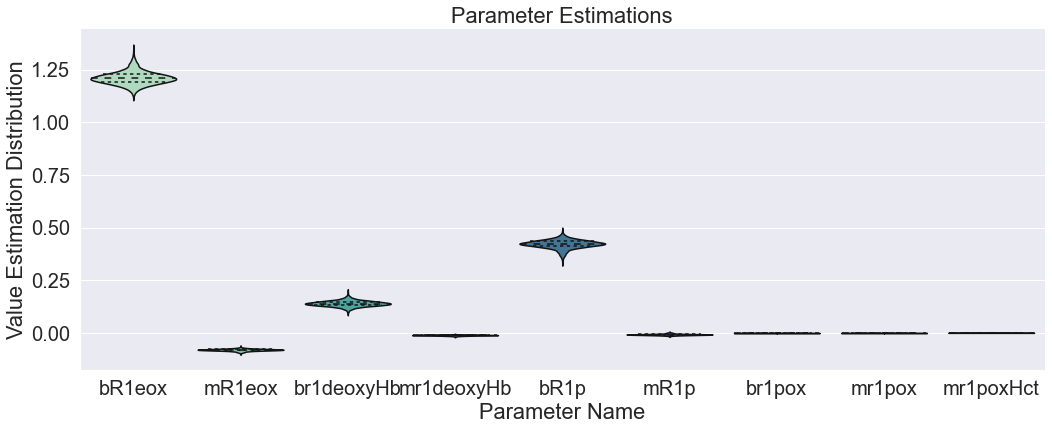

In [13]:
all_variables_o=np.array([list_of_bR1eox,list_of_mR1eox,list_of_br1deoxyHb, list_of_mr1deoxyHb, list_of_bR1p, list_of_mR1p,list_of_br1pox_r1,list_of_mr1pox_r1, list_of_mr1poxHct])
all_variables=all_variables_o.T
np.shape(all_variables)

all_variables_df = pd.DataFrame(all_variables, columns = ['bR1eox','mR1eox','br1deoxyHb', 'mr1deoxyHb', 'bR1p', 'mR1p','br1pox','mr1pox','mr1poxHct'])

sns.set(font_scale=1.82)
g = sns.catplot(data=all_variables_df,kind='violin',cut=0,scale='width',palette='mako_r',inner="quartile");
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 6)
plt.ylabel('Value Estimation Distribution')
plt.xlabel('Parameter Name')
plt.title('Parameter Estimations')


In [14]:
bR1eox_mean= np.mean(list_of_bR1eox)
mR1eox_mean=np.mean(list_of_mR1eox)
mr1deoxyHb_mean=np.mean(list_of_mr1deoxyHb)
br1deoxyHb_mean=np.mean(list_of_br1deoxyHb)
bR1p_mean=np.mean(list_of_bR1p)
mR1p_mean=np.mean(list_of_mR1p)
mr1poxHct_mean=np.mean(list_of_mr1poxHct)

bR1eox_std= np.std(list_of_bR1eox)
mR1eox_std=np.std(list_of_mR1eox)
mr1deoxyHb_std=np.std(list_of_mr1deoxyHb)
br1deoxyHb_std=np.std(list_of_br1deoxyHb)
bR1p_std=np.std(list_of_bR1p)
mR1p_std=np.std(list_of_mR1p)
mr1poxHct_std=np.std(list_of_mr1poxHct)

print('bR1eox mean =',bR1eox_mean)
print('mR1eox mean =',mR1eox_mean)
print('br1deoxyHb mean =',br1deoxyHb_mean)
print('mr1deoxyHb mean =',mr1deoxyHb_mean)
print('bR1p mean =',bR1p_mean)
print('mR1p mean =',mR1p_mean)
print('mr1poxHct mean =',mr1poxHct_mean)

print('bR1eox std =',bR1eox_std)
print('mR1eox std=',mR1eox_std)
print('br1deoxyHb std=',br1deoxyHb_std)
print('mr1deoxyHb std=',mr1deoxyHb_std)
print('bR1p std=',bR1p_std)
print('mR1p std=',mR1p_std)

lowerCI_bR1eox = bR1eox_mean - 1.96*bR1eox_std
upperCI_bR1eox = bR1eox_mean + 1.96*bR1eox_std

lowerCI_mR1eox = mR1eox_mean - 1.96*mR1eox_std
upperCI_mR1eox = mR1eox_mean + 1.96*mR1eox_std

lowerCI_br1deoxyHb = br1deoxyHb_mean - 1.96*br1deoxyHb_std
upperCI_br1deoxyHb = br1deoxyHb_mean + 1.96*br1deoxyHb_std

lowerCI_mr1deoxyHb = mr1deoxyHb_mean - 1.96*mr1deoxyHb_std
upperCI_mr1deoxyHb = mr1deoxyHb_mean + 1.96*mr1deoxyHb_std

lowerCI_bR1p = bR1p_mean - 1.96*bR1p_std
upperCI_bR1p = bR1p_mean + 1.96*bR1p_std

lowerCI_mR1p = mR1p_mean - 1.96*mR1p_std
upperCI_mR1p = mR1p_mean + 1.96*mR1p_std

lowerCI_mr1poxHct = mr1poxHct_mean - 1.96*mr1poxHct_std
upperCI_mr1poxHct = mr1poxHct_mean + 1.96*mr1poxHct_std


print(lowerCI_bR1eox)
print(upperCI_bR1eox )

print(lowerCI_mR1eox)
print(upperCI_mR1eox)

print(lowerCI_br1deoxyHb)
print(upperCI_br1deoxyHb )

print(lowerCI_mr1deoxyHb)
print(upperCI_mr1deoxyHb)

print(lowerCI_bR1p)
print(upperCI_bR1p)

print(lowerCI_mR1p )
print(upperCI_mR1p)


print(lowerCI_mr1poxHct )
print(upperCI_mr1poxHct)


br1pox_mean=np.mean(list_of_br1pox_r1)
mr1pox_mean=np.mean(list_of_mr1pox_r1)
br1pox_std=np.std(list_of_br1pox_r1)
mr1pox_std=np.std(list_of_mr1pox_r1)
print('br1poxmean =',br1pox_mean)
print('mr1poxmean =',mr1pox_mean)
print('br1poxstd =',br1pox_std)
print('mr1poxstd =',mr1pox_std)

lowerCI_br1pox = br1pox_mean - 1.96*br1pox_std
upperCI_br1pox = br1pox_mean + 1.96*br1pox_std

lowerCI_mr1pox = mr1pox_mean - 1.96*mr1pox_std
upperCI_mr1pox = mr1pox_mean + 1.96*mr1pox_std

print(lowerCI_br1pox )
print(upperCI_br1pox )

print(lowerCI_mr1pox)
print(upperCI_mr1pox)

bR1eox mean = 1.2108115996491586
mR1eox mean = -0.07990962357446629
br1deoxyHb mean = 0.14027867001762126
mr1deoxyHb mean = -0.010485669301919506
bR1p mean = 0.4222702300237056
mR1p mean = -0.007034343429547631
mr1poxHct mean = 0.0009389124659185643
bR1eox std = 0.030803703378898935
mR1eox std= 0.004892577198583964
br1deoxyHb std= 0.013127213340974558
mr1deoxyHb std= 0.002015278198752773
bR1p std= 0.02011156443466572
mR1p std= 0.0030541505191216184
1.1504363410265168
1.2711868582718004
-0.08949907488369085
-0.07032017226524173
0.11454933186931113
0.1660080081659314
-0.014435614571474941
-0.006535724032364071
0.3828515637317608
0.4616888963156504
-0.013020478447026003
-0.001048208412069259
0.0007626169453633278
0.0011152079864738009
br1poxmean = -0.00019013791522275408
mr1poxmean = 2.54830001136987e-05
br1poxstd = 5.0084457457646216e-05
mr1poxstd = 6.581483273273635e-06
-0.00028830345183974065
-9.19723786057675e-05
1.2583292898082375e-05
3.8382707329315026e-05


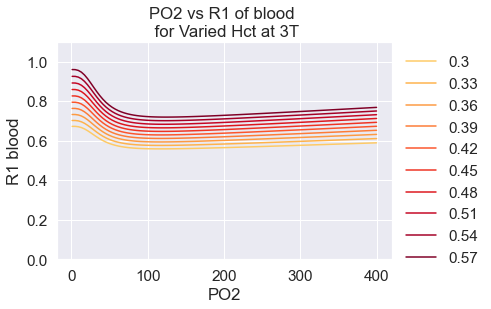

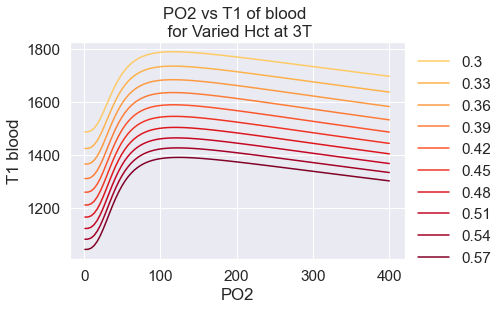

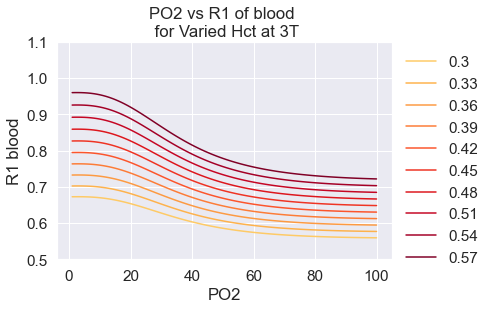

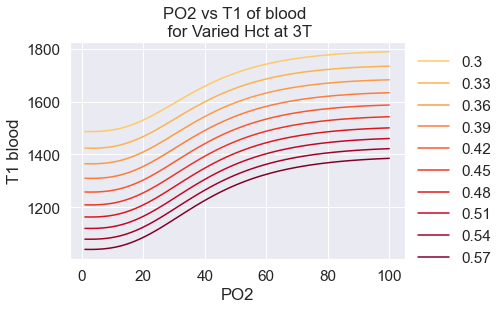

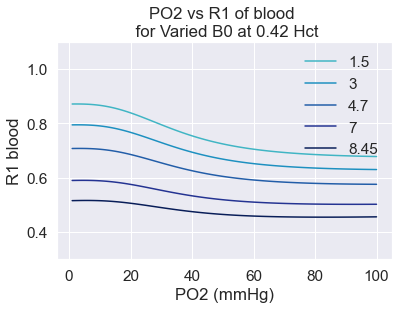

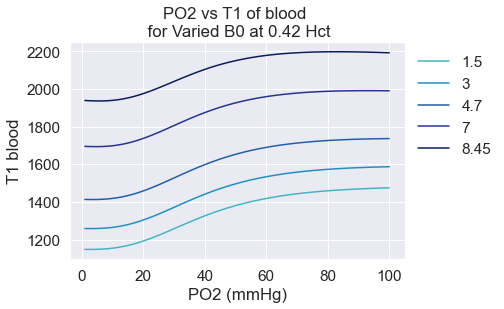

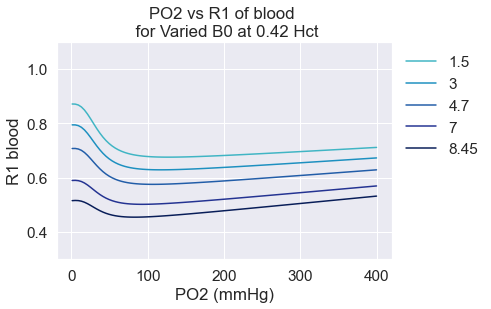

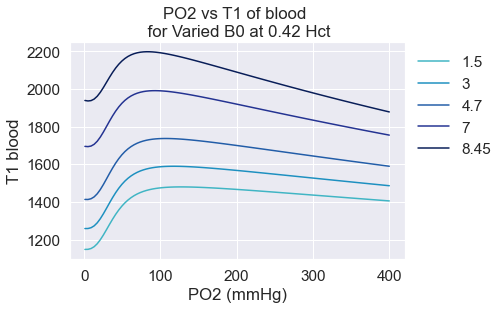

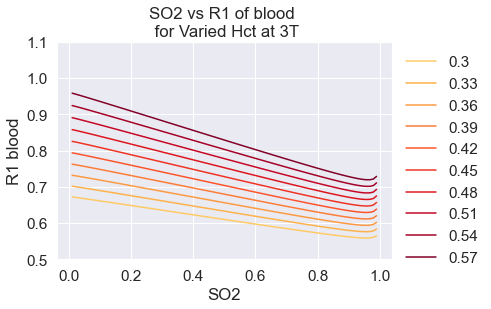

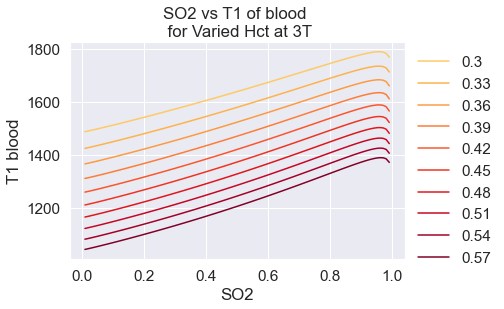

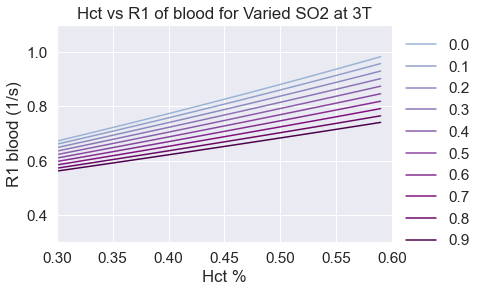

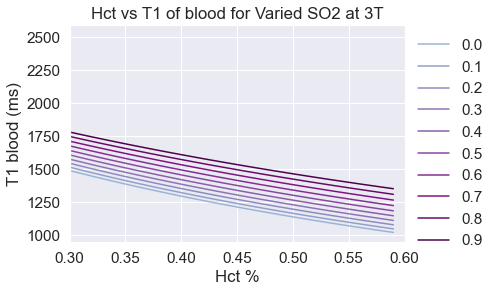

In [29]:
sns.set(font_scale=1.4)
B0=3 # Tesla
 # from 0-1
Hb=5.15 # mmol Hb tetramer/L plasma
#print(fwatere)
n=2.7
P50=37

po2_xaxis=np.linspace(1,400,100)
po2=po2_xaxis

fig1 = plt.figure()
ax1 = fig1.add_subplot(111) 
for x in range(30,60,3):
    Hct=x/100
    fw=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
    R1_blood=fw*((bR1eox_mean+(mR1eox_mean*B0))+((br1deoxyHb_mean+(mr1deoxyHb_mean*B0))*Hb*(1-((po2**n)/((po2**n)+(P50**n)))))) + (1-fw)*((bR1p_mean+(mR1p_mean*B0))+((br1pox_mean+(mr1pox_mean*B0)+(mr1poxHct_mean*Hct))*po2))
    plt.plot(po2_xaxis,R1_blood,label=str(Hct))
    plt.title('PO2 vs R1 of blood \n for Varied Hct at 3T')
    plt.xlabel('PO2')
    plt.ylabel('R1 blood')
    plt.ylim(0,1.1)
colormap = plt.cm.YlOrRd #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.3, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.legend(bbox_to_anchor=(1, 1))
    

fig1 = plt.figure()
ax1 = fig1.add_subplot(111) 
for x in range(30,60,3):
    Hct=x/100
    fw=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
    R1_blood=fw*((bR1eox_mean+(mR1eox_mean*B0))+((br1deoxyHb_mean+(mr1deoxyHb_mean*B0))*Hb*(1-((po2**n)/((po2**n)+(P50**n)))))) + (1-fw)*((bR1p_mean+(mR1p_mean*B0))+((br1pox_mean+(mr1pox_mean*B0)+(mr1poxHct_mean*Hct))*po2))
    T1_blood=(1/R1_blood)*1000
    plt.plot(po2_xaxis,T1_blood,label=str(Hct))
    plt.title('PO2 vs T1 of blood \n for Varied Hct at 3T')
    plt.xlabel('PO2')
    plt.ylabel('T1 blood')
colormap = plt.cm.YlOrRd #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.3, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.legend(bbox_to_anchor=(1, 1))

##########################################################################################

B0=3 # Tesla
 # from 0-1
Hb=5.15 # mmol Hb tetramer/L plasma
#print(fwatere)
n=2.7
P50=37

po2_xaxis=np.linspace(1,100,100)
po2=po2_xaxis

fig1 = plt.figure()
ax1 = fig1.add_subplot(111) 
for x in range(30,60,3):
    Hct=x/100
    fw=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
    R1_blood=fw*((bR1eox_mean+(mR1eox_mean*B0))+((br1deoxyHb_mean+(mr1deoxyHb_mean*B0))*Hb*(1-((po2**n)/((po2**n)+(P50**n)))))) + (1-fw)*((bR1p_mean+(mR1p_mean*B0))+((br1pox_mean+(mr1pox_mean*B0)+(mr1poxHct_mean*Hct))*po2))
    plt.plot(po2_xaxis,R1_blood,label=str(Hct))
    plt.title('PO2 vs R1 of blood \n for Varied Hct at 3T')
    plt.xlabel('PO2')
    plt.ylabel('R1 blood')
    plt.ylim(0.5,1.1)
colormap = plt.cm.YlOrRd #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.3, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.legend(bbox_to_anchor=(1, 1))
    

fig1 = plt.figure()
ax1 = fig1.add_subplot(111) 
for x in range(30,60,3):
    Hct=x/100
    fw=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
    R1_blood=fw*((bR1eox_mean+(mR1eox_mean*B0))+((br1deoxyHb_mean+(mr1deoxyHb_mean*B0))*Hb*(1-((po2**n)/((po2**n)+(P50**n)))))) + (1-fw)*((bR1p_mean+(mR1p_mean*B0))+((br1pox_mean+(mr1pox_mean*B0)+(mr1poxHct_mean*Hct))*po2))
    T1_blood=(1/R1_blood)*1000
    plt.plot(po2_xaxis,T1_blood,label=str(Hct))
    plt.title('PO2 vs T1 of blood \n for Varied Hct at 3T')
    plt.xlabel('PO2')
    plt.ylabel('T1 blood')
colormap = plt.cm.YlOrRd #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.3, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.legend(bbox_to_anchor=(1, 1))


#################################################################################

Hb=5.15 # mmol Hb tetramer/L plasma
Hct=0.42

po2_xaxis=np.linspace(1,100,100)
po2=po2_xaxis
 

fig1 = plt.figure()
ax1 = fig1.add_subplot(111) 
for x in [1.5,3,4.7,7,8.45]:
    B0=x
    fw=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
    R1_blood=fw*((bR1eox_mean+(mR1eox_mean*B0))+((br1deoxyHb_mean+(mr1deoxyHb_mean*B0))*Hb*(1-((po2**n)/((po2**n)+(P50**n)))))) + (1-fw)*((bR1p_mean+(mR1p_mean*B0))+((br1pox_mean+(mr1pox_mean*B0)+(mr1poxHct_mean*Hct))*po2))
    plt.plot(po2_xaxis,R1_blood,label=str(B0))
    plt.title('PO2 vs R1 of blood \n for Varied B0 at 0.42 Hct')
    plt.xlabel('PO2 (mmHg)')
    plt.ylim(0.3,1.1)
    plt.ylabel('R1 blood')
colormap = plt.cm.YlGnBu #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.5,1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.legend()
    

fig1 = plt.figure()
ax1 = fig1.add_subplot(111) 
for x in [1.5,3,4.7,7,8.45]:
    B0=x
    fw=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
    R1_blood=fw*((bR1eox_mean+(mR1eox_mean*B0))+((br1deoxyHb_mean+(mr1deoxyHb_mean*B0))*Hb*(1-((po2**n)/((po2**n)+(P50**n)))))) + (1-fw)*((bR1p_mean+(mR1p_mean*B0))+((br1pox_mean+(mr1pox_mean*B0)+(mr1poxHct_mean*Hct))*po2))
    T1_blood=(1/R1_blood)*1000
    plt.plot(po2_xaxis,T1_blood,label=str(B0))
    plt.title('PO2 vs T1 of blood \n for Varied B0 at 0.42 Hct')
    plt.xlabel('PO2 (mmHg)')
    plt.ylabel('T1 blood')
colormap = plt.cm.YlGnBu #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.5,1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.legend(bbox_to_anchor=(1, 1))

#################################################################################


Hb=5.15 # mmol Hb tetramer/L plasma
Hct=0.42

po2_xaxis=np.linspace(1,400,100)
po2=po2_xaxis
 

fig1 = plt.figure()
ax1 = fig1.add_subplot(111) 
for x in [1.5,3,4.7,7,8.45]:
    B0=x
    fw=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
    R1_blood=fw*((bR1eox_mean+(mR1eox_mean*B0))+((br1deoxyHb_mean+(mr1deoxyHb_mean*B0))*Hb*(1-((po2**n)/((po2**n)+(P50**n)))))) + (1-fw)*((bR1p_mean+(mR1p_mean*B0))+((br1pox_mean+(mr1pox_mean*B0)+(mr1poxHct_mean*Hct))*po2))
    plt.plot(po2_xaxis,R1_blood,label=str(B0))
    plt.title('PO2 vs R1 of blood \n for Varied B0 at 0.42 Hct')
    plt.xlabel('PO2 (mmHg)')
    plt.ylim(0.3,1.1)
    plt.ylabel('R1 blood')
colormap = plt.cm.YlGnBu #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.5,1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.legend(bbox_to_anchor=(1, 1))
    

fig1 = plt.figure()
ax1 = fig1.add_subplot(111) 
for x in [1.5,3,4.7,7,8.45]:
    B0=x
    fw=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
    R1_blood=fw*((bR1eox_mean+(mR1eox_mean*B0))+((br1deoxyHb_mean+(mr1deoxyHb_mean*B0))*Hb*(1-((po2**n)/((po2**n)+(P50**n)))))) + (1-fw)*((bR1p_mean+(mR1p_mean*B0))+((br1pox_mean+(mr1pox_mean*B0)+(mr1poxHct_mean*Hct))*po2))
    T1_blood=(1/R1_blood)*1000
    plt.plot(po2_xaxis,T1_blood,label=str(B0))
    plt.title('PO2 vs T1 of blood \n for Varied B0 at 0.42 Hct')
    plt.xlabel('PO2 (mmHg)')
    plt.ylabel('T1 blood')
colormap = plt.cm.YlGnBu #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.5,1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.legend(bbox_to_anchor=(1, 1))


#################################################################################



B0=3 # Tesla
 # from 0-1
Hb=5.15 # mmol Hb tetramer/L plasma

fig1 = plt.figure()
ax1 = fig1.add_subplot(111) 
for x in range(30,60,3):
    Hct=x/100
    fw=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
    so2=(np.arange(1,100))/100
    po2=(-(so2*(P50**n))/(so2-1))**(1/n)
    R1_blood=fw*((bR1eox_mean+(mR1eox_mean*B0))+((br1deoxyHb_mean+(mr1deoxyHb_mean*B0))*Hb*(1-((po2**n)/((po2**n)+(P50**n)))))) + (1-fw)*((bR1p_mean+(mR1p_mean*B0))+((br1pox_mean+(mr1pox_mean*B0)+(mr1poxHct_mean*Hct))*po2))
    plt.plot(so2,R1_blood,label=str(Hct))
    plt.title('SO2 vs R1 of blood \n for Varied Hct at 3T')
    plt.xlabel('SO2')
    plt.ylabel('R1 blood')
    plt.ylim(0.5,1.1)
colormap = plt.cm.YlOrRd #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.3, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.legend(bbox_to_anchor=(1, 1))
    

fig1 = plt.figure()
ax1 = fig1.add_subplot(111) 
for x in range(30,60,3):
    Hct=x/100
    fw=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
    so2=(np.arange(1,100))/100
    po2=(-(so2*(P50**n))/(so2-1))**(1/n)
    R1_blood=fw*((bR1eox_mean+(mR1eox_mean*B0))+((br1deoxyHb_mean+(mr1deoxyHb_mean*B0))*Hb*(1-((po2**n)/((po2**n)+(P50**n)))))) + (1-fw)*((bR1p_mean+(mR1p_mean*B0))+((br1pox_mean+(mr1pox_mean*B0)+(mr1poxHct_mean*Hct))*po2))
    T1_blood=(1/R1_blood)*1000
    plt.plot(so2,T1_blood,label=str(Hct))
    plt.title('SO2 vs T1 of blood \n for Varied Hct at 3T')
    plt.xlabel('SO2')
    plt.ylabel('T1 blood')
colormap = plt.cm.YlOrRd #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.3, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.legend(bbox_to_anchor=(1, 1))


#################################################################################


Hb=5.15 # mmol Hb tetramer/L plasma
#print(fwatere)
B0=3

Hct=(np.arange(1,60))/100
fw=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))

fig1 = plt.figure()
ax1 = fig1.add_subplot(111) 
for i in range(0,100,10):
    so2=i/100
    po2=(-(so2*(P50**n))/(so2-1))**(1/n)
    R1_blood=fw*((bR1eox_mean+(mR1eox_mean*B0))+((br1deoxyHb_mean+(mr1deoxyHb_mean*B0))*Hb*(1-((po2**n)/((po2**n)+(P50**n)))))) + (1-fw)*((bR1p_mean+(mR1p_mean*B0))+((br1pox_mean+(mr1pox_mean*B0)+(mr1poxHct_mean*Hct))*po2))
    plt.plot(Hct,R1_blood,label=str(so2))
    colormap = plt.cm.BuPu #nipy_spectral, Set1,Paired   
    colors = [colormap(i) for i in np.linspace(0.4, 1,len(ax1.lines))]
    for i,j in enumerate(ax1.lines):
        j.set_color(colors[i])
    plt.title('Hct vs R1 of blood for Varied SO2 at 3T')
    plt.xlabel('Hct %')
    plt.ylabel('R1 blood (1/s)')
    plt.xlim(0.3,0.6)
    plt.ylim(0.3,1.1)
    plt.legend(bbox_to_anchor=(1, 1))

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
for i in range(0,100,10):
    so2=i/100
    po2=(-(so2*(P50**n))/(so2-1))**(1/n)
    R1_blood=fw*((bR1eox_mean+(mR1eox_mean*B0))+((br1deoxyHb_mean+(mr1deoxyHb_mean*B0))*Hb*(1-((po2**n)/((po2**n)+(P50**n)))))) + (1-fw)*((bR1p_mean+(mR1p_mean*B0))+((br1pox_mean+(mr1pox_mean*B0)+(mr1poxHct_mean*Hct))*po2))
    T1_blood=(1/R1_blood)*1000
    plt.plot(Hct,T1_blood,label=str(so2))
    colormap = plt.cm.BuPu #nipy_spectral, Set1,Paired   
    colors = [colormap(i) for i in np.linspace(0.4, 1,len(ax2.lines))]
    for i,j in enumerate(ax2.lines):
        j.set_color(colors[i])
    plt.title('Hct vs T1 of blood for Varied SO2 at 3T')
    plt.xlabel('Hct %')
    plt.ylabel('T1 blood (ms)')
    plt.xlim(0.3,0.6)
    plt.legend(bbox_to_anchor=(1, 1))

In [15]:
r1data_normalonly = pd.read_csv('R1blood_data_table_normalonly.csv')
r1data_normalonly


bR1eox_EB=bR1eox_mean
mR1eox_EB=mR1eox_mean
br1deoxyHb_EB=br1deoxyHb_mean
mr1deoxyHb_EB=mr1deoxyHb_mean
bR1p_EB=bR1p_mean
mR1p_EB=mR1p_mean
mr1pox_EB=mr1pox_mean
br1pox_EB=br1pox_mean
mr1poxHct_EB=mr1poxHct_mean



bR1eox_Hales=1.10
mR1eox_Hales=-0.058
br1deoxyHb_Hales=0.033
bR1p_Hales=0.49
mR1p_Hales=-0.023


B0_test=r1data_normalonly.B0
y_test=r1data_normalonly.R1
fw_test=r1data_normalonly.fwatere
po2_test=r1data_normalonly.po2
so2_test=r1data_normalonly.so2
Hct_test=r1data_normalonly.Hct

n=2.7
P50=37
Hb=5.15



y_guess_EB=fw_test*((bR1eox_EB+(mR1eox_EB*B0_test)) + ((br1deoxyHb_EB+(mr1deoxyHb_EB*B0_test))*Hb*(1-((po2_test**n)/((po2_test**n)+(P50**n)))))) + (1-fw_test)*((bR1p_EB+(mR1p_EB*B0_test))+((br1pox_EB+(mr1pox_EB*B0_test)+(mr1poxHct_EB*Hct_test))*po2_test))
y_guess_Hales=fw_test*((bR1eox_Hales+(mR1eox_Hales*B0_test)) + (br1deoxyHb_Hales*Hb*(1-so2_test))) + (1-fw_test)*((bR1p_Hales+(mR1p_Hales*B0_test)))


y_guess_EB_reshape=np.reshape(y_guess_EB.to_numpy(),(-1, 1))
y_guess_Hales_reshape=np.reshape(y_guess_Hales.to_numpy(),(-1, 1))
y_test_reshape=np.reshape(y_test.to_numpy(),(-1, 1))

reg_Hales_v_true = LinearRegression().fit(y_test_reshape, y_guess_Hales_reshape)
reg_EB_v_true = LinearRegression().fit(y_test_reshape, y_guess_EB_reshape)
reg_Hales_v_EB = LinearRegression().fit(y_guess_Hales_reshape, y_guess_EB_reshape)


In [16]:
print('Hales vs True R2=',reg_Hales_v_true.score(y_test_reshape, y_guess_Hales_reshape))
print('EB vs True R2=',reg_EB_v_true.score(y_test_reshape, y_guess_EB_reshape))
print('Hales vs EB R2=',reg_Hales_v_EB.score(y_guess_Hales_reshape, y_guess_EB_reshape))


Hales vs True R2= 0.7948732010013818
EB vs True R2= 0.8337519105414417
Hales vs EB R2= 0.9594398233108467


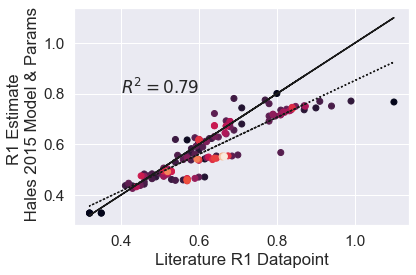

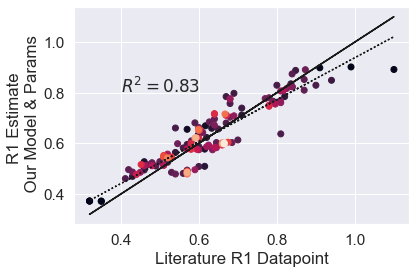

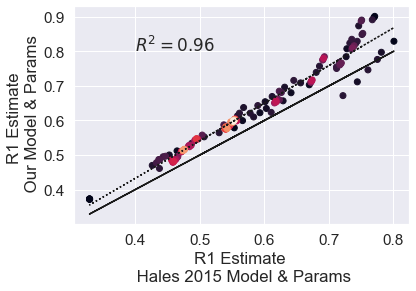

In [17]:
sns.set(font_scale=1.4)
density_scatter(y_test, y_guess_Hales, bins = [50,50] )
plt.plot(y_test, y_test,'k')
plt.plot(y_test,np.squeeze(reg_Hales_v_true.predict(y_test_reshape)),'k',linestyle='dotted')
plt.xlabel('Literature R1 Datapoint')
plt.ylabel('R1 Estimate \n Hales 2015 Model & Params')
plt.text(0.4,0.8, '$R^2=0.79$')
plt.show()

density_scatter(y_test, y_guess_EB, bins = [50,50] )
plt.plot(y_test, y_test,'k')
plt.plot(y_test,np.squeeze(reg_EB_v_true.predict(y_test_reshape)),'k',linestyle='dotted')
plt.xlabel('Literature R1 Datapoint')
plt.ylabel('R1 Estimate \n Our Model & Params')
plt.text(0.4,0.8, '$R^2=0.83$')
plt.show()

density_scatter(y_guess_Hales, y_guess_EB, bins = [50,50] )
plt.plot(y_guess_Hales, y_guess_Hales,'k')
plt.plot(y_guess_Hales,np.squeeze(reg_Hales_v_EB.predict(y_guess_Hales_reshape)),'k',linestyle='dotted')
plt.xlabel('R1 Estimate \n Hales 2015 Model & Params')
plt.ylabel('R1 Estimate \n Our Model & Params')
plt.text(0.4,0.8, '$R^2=0.96$')
plt.show()


0.0032478227229334094
Estimate vs True R2= 0.8319548788255109


Text(0.5, 1.0, 'Full Dataset True R1 vs Estimation R1')

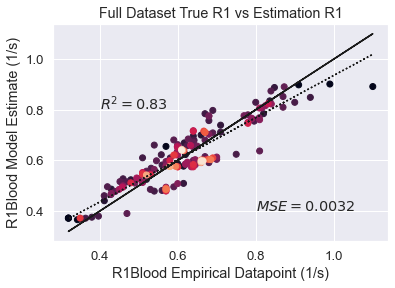

In [27]:
from sklearn.metrics import mean_squared_error
r1data_all = pd.read_csv('R1blood_data_table.csv')
r1data_all

bR1eox_EB=bR1eox_mean
mR1eox_EB=mR1eox_mean
br1deoxyHb_EB=br1deoxyHb_mean
mr1deoxyHb_EB=mr1deoxyHb_mean
bR1p_EB=bR1p_mean
mR1p_EB=mR1p_mean
mr1pox_EB=mr1pox_mean
br1pox_EB=br1pox_mean
mr1poxHct_EB=mr1poxHct_mean

n=2.7
P50=37
Hb=5.15

B0_all=r1data_all.B0
y_all=r1data_all.R1
fw_all=r1data_all.fwatere
po2_all=r1data_all.po2
so2_all=r1data_all.so2
Hct_all=r1data_all.Hct

y_pred=fw_all*((bR1eox_EB+(mR1eox_EB*B0_all)) + ((br1deoxyHb_EB+(mr1deoxyHb_EB*B0_all))*Hb*(1-((po2_all**n)/((po2_all**n)+(P50**n)))))) + (1-fw_all)*((bR1p_EB+(mR1p_EB*B0_all))+((br1pox_EB+(mr1pox_EB*B0_all)+(mr1poxHct_EB*Hct_all))*po2_all))
y_true=y_all

meanSE=mean_squared_error(y_true, y_pred)
print(meanSE)

y_pred=np.asarray(y_pred)
y_true=np.asarray(y_true)

y_pred_reshape=y_pred.reshape(-1, 1)
y_true_reshape=y_true.reshape(-1, 1)

reg_v_true_final = LinearRegression().fit(y_true_reshape,y_pred_reshape)

density_scatter(y_true,y_pred,bins = [50,50])
print('Estimate vs True R2=',reg_v_true_final.score(y_true_reshape,y_pred_reshape))
plt.plot(y_true,y_true,'k')
plt.plot(y_true_reshape,np.squeeze(reg_v_true_final.predict(y_true_reshape)),'k',linestyle='dotted')
plt.text(0.4,0.8, '$R^2=0.83$')
plt.text(0.8,0.4, '$MSE=0.0032$')
plt.xlabel('R1Blood Empirical Datapoint (1/s)')
plt.ylabel('R1Blood Model Estimate (1/s)')
plt.title('Full Dataset True R1 vs Estimation R1')


In [19]:
silvennoinendata = pd.read_csv('silvennoinen.csv')
silvennoinendata

,R1,Y,po2
0,0.600,0.990,202.920475
1,0.580,0.970,134.069976
2,0.600,0.940,102.514583
3,0.635,0.940,102.514583
4,0.595,0.910,87.166470
5,0.615,0.900,83.488157
6,0.645,0.850,70.341556
7,0.640,0.840,68.379732
8,0.620,0.820,64.879266
9,0.625,0.770,57.883975


/Users/emmabluemke/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


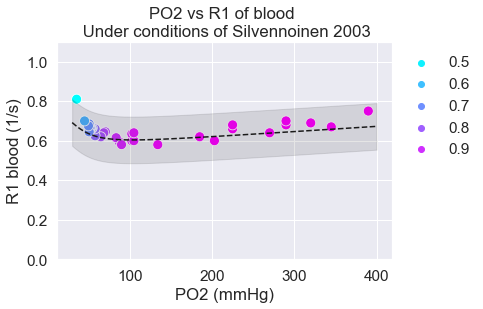

In [20]:
sns.scatterplot(silvennoinendata.po2,silvennoinendata.R1,hue=silvennoinendata.Y,palette="cool",s=100)
plt.ylim(0.5,0.9)

sns.set(font_scale=1.4)
B0=4.7 # Tesla
 # from 0-1
Hb=5.15 # mmol Hb tetramer/L plasma
#print(fwatere)
n=2.7
P50=37

Hct=0.47

po2_xaxis=np.linspace(30,400,100)
po2=po2_xaxis

fw=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
R1_blood=fw*((bR1eox_mean+(mR1eox_mean*B0))+((br1deoxyHb_mean+(mr1deoxyHb_mean*B0))*Hb*(1-((po2**n)/((po2**n)+(P50**n)))))) + (1-fw)*((bR1p_mean+(mR1p_mean*B0))+(br1pox_mean+(mr1pox_mean*B0)+(mr1poxHct_mean*Hct)*po2))
plt.fill_between(po2_xaxis, (R1_blood-1.96*std_R1error), (R1_blood+1.96*std_R1error), color='black', alpha=0.1)
plt.plot(po2_xaxis,R1_blood,'k',linestyle='dashed')
plt.ylim(0,1.1)
plt.title('PO2 vs R1 of blood \n Under conditions of Silvennoinen 2003')
plt.xlabel('PO2 (mmHg)')
plt.ylabel('R1 blood (1/s)')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()



(-0.12, 0.15)

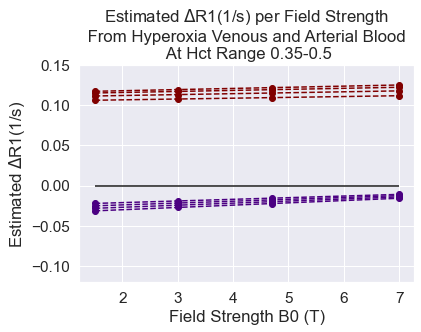

In [24]:
Hb=5.15 # mmol Hb tetramer/L plasma

po2_xaxis=np.linspace(39,48,50)
po2_before=98
po2_after=600
list_R1delta_artery=np.zeros((10,4))
list_R1delta_venous=np.zeros((10,4))
B0_list_xaxis=[1.5,3,4.7,7]


jcounter=0


fig1 = plt.figure()
ax1 = fig1.add_subplot(111) 
for j in range(35,50,4):
    i=0
    Hct=j/100
    for x in [1.5,3,4.7,7]:
        B0=x
        fw=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
        po2=po2_before
        R1_blood_before=fw*((bR1eox_mean+(mR1eox_mean*B0))+((br1deoxyHb_mean+(mr1deoxyHb_mean*B0))*Hb*(1-((po2**n)/((po2**n)+(P50**n)))))) + (1-fw)*((bR1p_mean+(mR1p_mean*B0))+(br1pox_mean+(mr1pox_mean*B0)+(mr1poxHct_mean*Hct)*po2))
        po2=po2_after
        R1_blood_after=fw*((bR1eox_mean+(mR1eox_mean*B0))+((br1deoxyHb_mean+(mr1deoxyHb_mean*B0))*Hb*(1-((po2**n)/((po2**n)+(P50**n)))))) + (1-fw)*((bR1p_mean+(mR1p_mean*B0))+(br1pox_mean+(mr1pox_mean*B0)+(mr1poxHct_mean*Hct)*po2))
        deltaR1=R1_blood_after-R1_blood_before
        list_R1delta_artery[jcounter,i]=deltaR1
        
        po2=39
        R1_blood_before=fw*((bR1eox_mean+(mR1eox_mean*B0))+((br1deoxyHb_mean+(mr1deoxyHb_mean*B0))*Hb*(1-((po2**n)/((po2**n)+(P50**n)))))) + (1-fw)*((bR1p_mean+(mR1p_mean*B0))+(br1pox_mean+(mr1pox_mean*B0)+(mr1poxHct_mean*Hct)*po2))
        po2=48
        R1_blood_after=fw*((bR1eox_mean+(mR1eox_mean*B0))+((br1deoxyHb_mean+(mr1deoxyHb_mean*B0))*Hb*(1-((po2**n)/((po2**n)+(P50**n)))))) + (1-fw)*((bR1p_mean+(mR1p_mean*B0))+(br1pox_mean+(mr1pox_mean*B0)+(mr1poxHct_mean*Hct)*po2))
        deltaR1=R1_blood_after-R1_blood_before
        list_R1delta_venous[jcounter,i]=deltaR1
        
        i=i+1
        
    plt.plot(B0_list_xaxis,list_R1delta_artery[jcounter],'o',linestyle='dashed',color='maroon')
    plt.plot(B0_list_xaxis,list_R1delta_venous[jcounter],'o',linestyle='dashed',color='indigo')

    jcounter=jcounter+1
    
plt.hlines(0,np.min(B0_list_xaxis),np.max(B0_list_xaxis),'k')
plt.title('Estimated $\Delta$R1(1/s) per Field Strength \n From Hyperoxia Venous and Arterial Blood \n At Hct Range 0.35-0.5')
plt.xlabel('Field Strength B0 (T)')
plt.ylabel('Estimated $\Delta$R1(1/s)')
plt.ylim(-0.12,0.15)

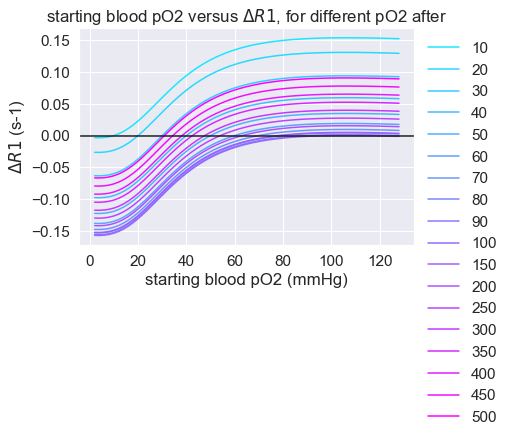

In [25]:
Hct=0.42 # from 0-1
Hb=5.15 # mmol Hb tetramer/L plasma
#print(fwatere)
B0=3

from matplotlib import cm
from colorspacious import cspace_converter #pip install colorspacious
from collections import OrderedDict


paO2_after_list=[10,20,30,40,50,60,70,80,90,100,150,200,250,300,350,400,450,500]
paO2_before_list=np.arange(2,130,2,dtype=float)# mmHg
delta_R1bloodtotal_list=np.zeros(len(paO2_before_list))

        
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

fw=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))

    
for j in range(0,len(paO2_after_list)):
    for i in range(0,len(paO2_before_list)):
        #R1arterialbefore:
        
        paO2before=paO2_before_list[i] #mmHg
        po2=paO2before
        R1_blood_before=fw*((bR1eox_mean+(mR1eox_mean*B0))+((br1deoxyHb_mean+(mr1deoxyHb_mean*B0))*Hb*(1-((po2**n)/((po2**n)+(P50**n)))))) + (1-fw)*((bR1p_mean+(mR1p_mean*B0))+(br1pox_mean+(mr1pox_mean*B0)+(mr1poxHct_mean*Hct)*po2))

        #R1arterialafter:
        paO2after=paO2_after_list[j] #mmHg
        po2=paO2after
        R1_blood_after=fw*((bR1eox_mean+(mR1eox_mean*B0))+((br1deoxyHb_mean+(mr1deoxyHb_mean*B0))*Hb*(1-((po2**n)/((po2**n)+(P50**n)))))) + (1-fw)*((bR1p_mean+(mR1p_mean*B0))+(br1pox_mean+(mr1pox_mean*B0)+(mr1poxHct_mean*Hct)*po2))

        deltapaO2=paO2after-paO2before
        
        deltaR1bloodtotal=R1_blood_after-R1_blood_before

        delta_R1bloodtotal_list[i]=deltaR1bloodtotal

    ax1.plot(paO2_before_list,delta_R1bloodtotal_list,label=str(paO2after))
    
colormap = plt.cm.cool #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.1, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.axhline(color='k')
plt.title('starting blood pO2 versus $\Delta R1$, for different pO2 after')
plt.xlabel('starting blood pO2 (mmHg)')
plt.ylabel('$\Delta R1$ (s-1)')
plt.legend(bbox_to_anchor=(1, 1))

plt.legend(bbox_to_anchor=(1, 1))
    
    

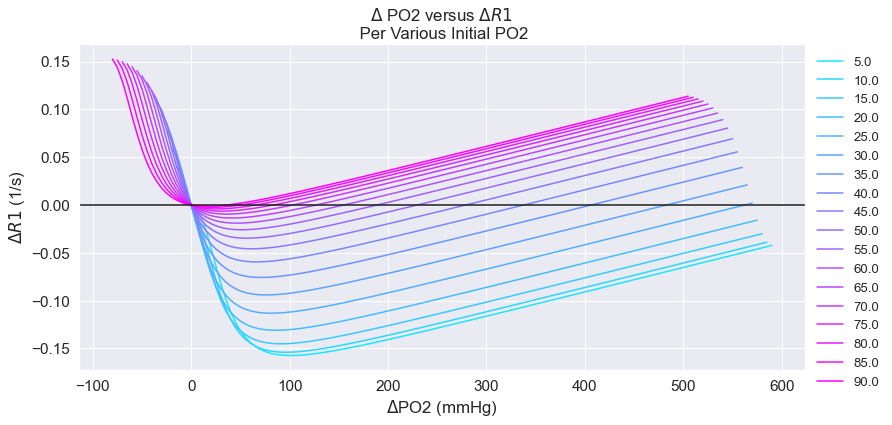

In [26]:
sns.set(font_scale=1.4)
Hct=0.42 # from 0-1
Hb=5.15 # mmol Hb tetramer/L plasma
#print(fwatere)
B0=3


paO2_after_list=np.arange(10,600,5,dtype=float)
paO2_before_list=np.arange(5,95,5,dtype=float)# mmHg

delta_R1bloodtotal_list=np.zeros((len(paO2_before_list),len(paO2_after_list)))

deltapaO2_list=np.zeros((len(paO2_before_list),len(paO2_after_list)))


fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

for i in range(0,len(paO2_before_list)):
    for j in range(0,len(paO2_after_list)):
        #R1arterialbefore:
        paO2before=paO2_before_list[i] #mmHg
        po2=paO2before
        R1_blood_before=fw*((bR1eox_mean+(mR1eox_mean*B0))+((br1deoxyHb_mean+(mr1deoxyHb_mean*B0))*Hb*(1-((po2**n)/((po2**n)+(P50**n)))))) + (1-fw)*((bR1p_mean+(mR1p_mean*B0))+(br1pox_mean+(mr1pox_mean*B0)+(mr1poxHct_mean*Hct)*po2))

        #R1arterialafter:
        paO2after=paO2_after_list[j] #mmHg
        po2=paO2after
        R1_blood_after=fw*((bR1eox_mean+(mR1eox_mean*B0))+((br1deoxyHb_mean+(mr1deoxyHb_mean*B0))*Hb*(1-((po2**n)/((po2**n)+(P50**n)))))) + (1-fw)*((bR1p_mean+(mR1p_mean*B0))+(br1pox_mean+(mr1pox_mean*B0)+(mr1poxHct_mean*Hct)*po2))

        deltapaO2=paO2after-paO2before
        
        deltaR1bloodtotal=R1_blood_after-R1_blood_before
        
        paO2before=paO2_before_list[i] #mmHg

        deltapaO2_list[i,j]=deltapaO2

        delta_R1bloodtotal_list[i,j]=deltaR1bloodtotal

    
for i in range(0,len(paO2_before_list)):
    plt.plot(deltapaO2_list[i],delta_R1bloodtotal_list[i],label=paO2_before_list[i])

colormap = plt.cm.cool #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.1, 1,len(ax2.lines))]
for i,j in enumerate(ax2.lines):
    j.set_color(colors[i])
    
plt.axhline(color='k')

 
plt.title('$\Delta$ PO2 versus $\Delta R1$ \n Per Various Initial PO2')
plt.xlabel('$\Delta $PO2 (mmHg)')
plt.ylabel('$\Delta R1$ (1/s)')
sns.set(font_scale=1.2)
plt.legend(bbox_to_anchor=(1, 1))
fig2.set_size_inches(13, 6)
